# Kaggle:  Digit Recognizer

In [90]:
import os
import sys
import numpy as np 
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras

from matplotlib import pyplot as plt

%matplotlib inline


### Prepare Data 

- Split training data to train features and train label
- Reshape to tensor input
- Rescale


In [91]:
train_file = 'train.csv'
test_file  = 'test.csv'


def load_data(train_file=None,test_file=None):
    curdir = os.getcwd()
    train_data_file = os.path.join(curdir,train_file)
    test_data_file = os.path.join(curdir,test_file)
    

    if not os.path.exists(train_data_file) or not os.path.exists(test_data_file):
        print("Excepted data files does not exist")
        os.system(1)

    train_data     =  pd.read_csv(train_data_file)
    test_data      =  pd.read_csv(test_data_file)
    test_data      =  test_data.values 
       
    train_features = train_data.drop(columns=['label'])
    train_label    = train_data['label']
   
    #vectorize 
    train_features = train_features.values
    train_label    = train_label.values
    train_features = np.reshape(train_features,(train_features.shape[0],28,28,1))
    test_data      =  np.reshape(test_data,(test_data.shape[0],28,28,1))
    
    #rescale
    train_features = train_features.astype('float32') / 255.0
    train_label   = keras.utils.to_categorical(train_label)


    return train_features,train_label,test_data
 


train_x,train_y,test_data = load_data(train_file=train_file,test_file=test_file)

### Build CNN Model

- Use Sequential Model
- Two Conv2D layers (32 nodes, relu as activation function)
- Enable (2,2) MaxPooling after each Conv2D layer
- Flatten (from Conv2D to Dense Layer)
- One Dense layer with 64 nodes
- Last layer with 10 nodes (mapping to 0-9 digits prediction)

model compile:
- optimizer: adam
- loss function: categorical_crossentropy as it is multi classrification problem
- metrics: accuracy 



In [92]:
def build_CNN_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))     
    model.add(keras.layers.Flatten())  
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))

    model.summary()
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model


model = build_CNN_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

Train and Evaluate model

- Split train data in 80-20 train-validate sets
- Try different epoch size
- Plot and evaluate train accuracy abd validate accuracy agains epoch


Epoch 1/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0528 - val_accuracy: 0.9835
Epoch 2/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0432 - val_accuracy: 0.9876
Epoch 3/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0490 - val_accuracy: 0.9854
Epoch 4/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0488 - val_accuracy: 0.9880
Epoch 5/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0445 - val_accuracy: 0.9887
Epoch 6/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0428 - val_accuracy: 0.9888
Epoch 7/10
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0434 -

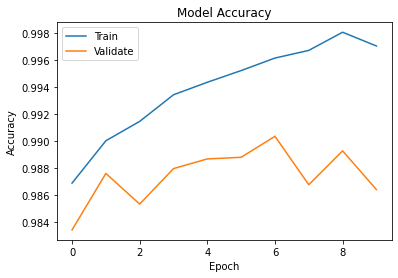

In [94]:
val_result = []
epoch_size = 10

history = model.fit(train_x,train_y,validation_split=0.2,epochs=epoch_size,batch_size=32,shuffle=True,verbose=True)

#plot train and validate accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()



In [95]:
### Finalize model 
best_epoch_size = 6
model.fit(train_x,train_y,validation_split=0.2,epochs=best_epoch_size,batch_size=32,shuffle=True,verbose=True)



Epoch 1/6
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.0649 - val_accuracy: 0.9879
Epoch 2/6
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0471 - val_accuracy: 0.9905
Epoch 3/6
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0031 - accuracy: 0.9988 - val_loss: 0.0561 - val_accuracy: 0.9888
Epoch 4/6
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 0.0714 - val_accuracy: 0.9876
Epoch 5/6
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0598 - val_accuracy: 0.9892
Epoch 6/6
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0041 - accuracy: 0.9984 - val_loss: 0.0625 - val_accuracy: 0.9886


### Predict on test data 

Prediction: 9


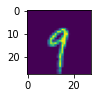

Prediction: 4


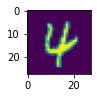

Prediction: 6


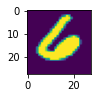

Prediction: 4


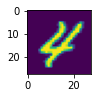

Prediction: 6


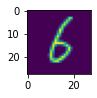

Prediction: 4


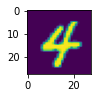

Prediction: 2


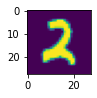

Prediction: 8


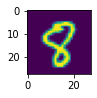

Prediction: 7


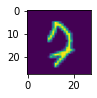

Prediction: 1


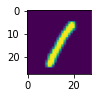

In [96]:
predictions_raw = model.predict(test_data)
predictions = np.argmax(predictions_raw,axis=1)

#submissions to Kaggle
submissions = pd.DataFrame({'ImageId': np.arange(1, predictions.shape[0]+1), 'Label': predictions})    
submissions.to_csv('submission.csv', index=False)

#visualize random ten predict results
for i in range(10):
    figure = plt.figure()
    figure.add_subplot(3,4,(i+1))
    idx = np.random.randint(len(test_data))
    plt.imshow(test_data[idx])
    print("Prediction: {}".format(predictions[idx]))
    plt.show(block=True)
    
